In [1]:
## fetching the dataset
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/abhijitpaul0212/GemstonePricePrediction/refs/heads/master/notebooks/data/gemstone.csv")


## saving the dataframe into the local dir
df.to_csv("data/gemstone.csv",index=False)

## display the head
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [2]:
## removing the id column 
df.drop("id",axis=1,inplace=True)

In [3]:
## checking for summary stats
df.describe().T.style.background_gradient(cmap="Greens")

,count,mean,std,min,25%,50%,75%,max
carat,193573.000000,0.790688,0.462688,0.200000,0.400000,0.700000,1.030000,3.500000
depth,193573.000000,61.820574,1.081704,52.100000,61.300000,61.900000,62.400000,71.600000
table,193573.000000,57.227675,1.918844,49.000000,56.000000,57.000000,58.000000,79.000000
x,193573.000000,5.715312,1.109422,0.000000,4.700000,5.700000,6.510000,9.650000
y,193573.000000,5.720094,1.102333,0.000000,4.710000,5.720000,6.510000,10.010000
z,193573.000000,3.534246,0.688922,0.000000,2.900000,3.530000,4.030000,31.300000
price,193573.000000,3969.155414,4034.374138,326.000000,951.000000,2401.000000,5408.000000,18818.000000


In [4]:
## Carat has high max value indicating strong positive skewed distribution with indicator of possible outliers. Might need to use log transformation technique.
## Depth approx normal distribution
## Table high max -> positive skewed distribution
## x,y - right skewed distribution
## z -> high max -> possible outlier -> strong right skewed distribution
## price -> high max -> strong positive max -> strong positive skewed distribution

## No indication of missing value 

In [5]:
## checking for data type from the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [6]:
## ['Cut','Color','Clarity'] -> categorical feature
## [rest of the features are countinus feature]
## Target function price -> int

In [7]:
## checking for missing values in dataframe
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
## checking for duplicates 
df.duplicated().sum()

np.int64(0)

In [9]:
## Zero Null Value and Zero Duplicates found.. 

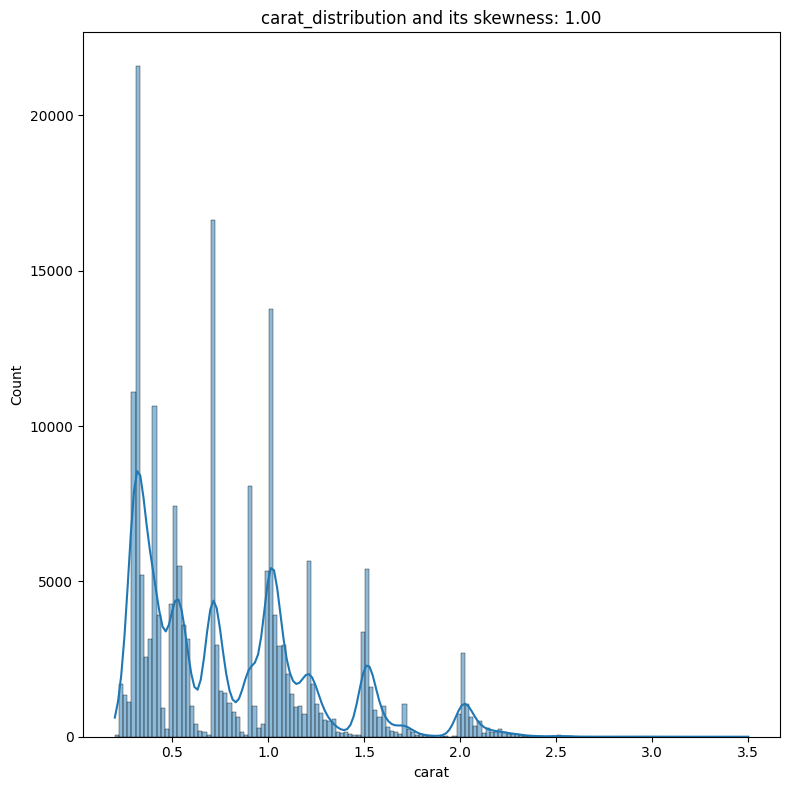

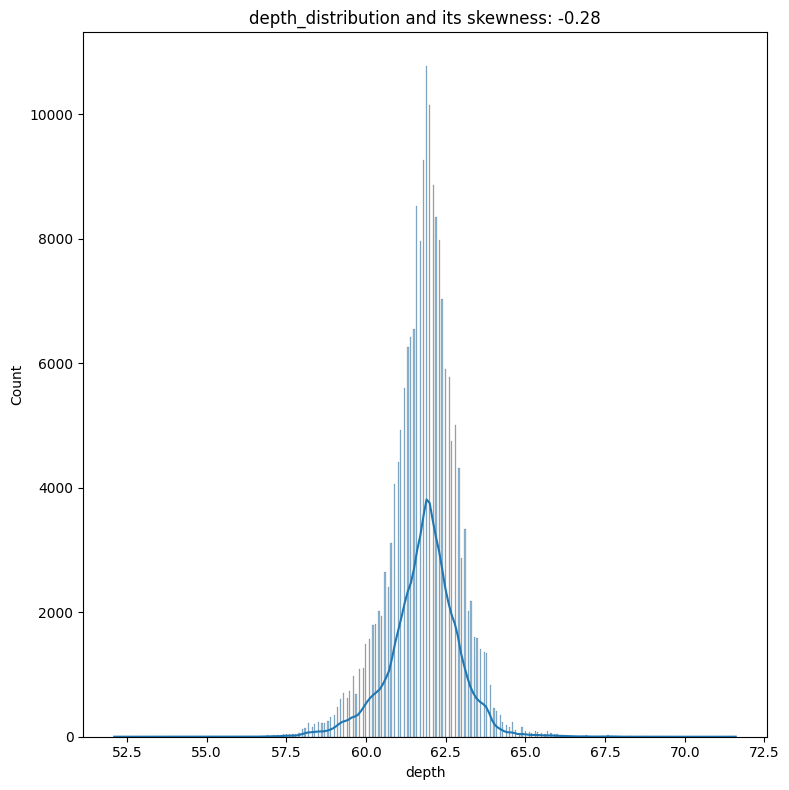

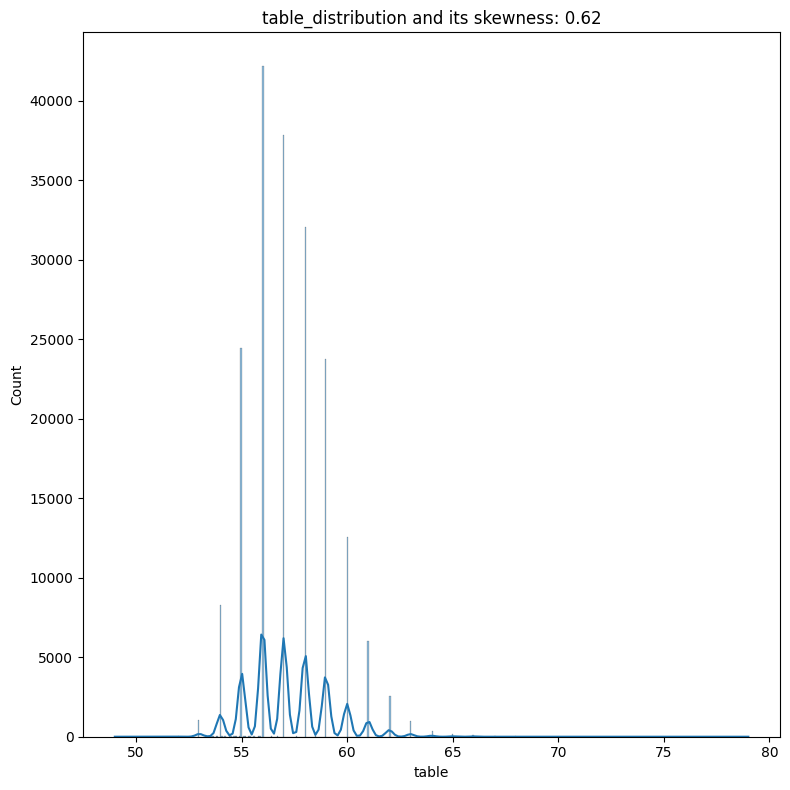

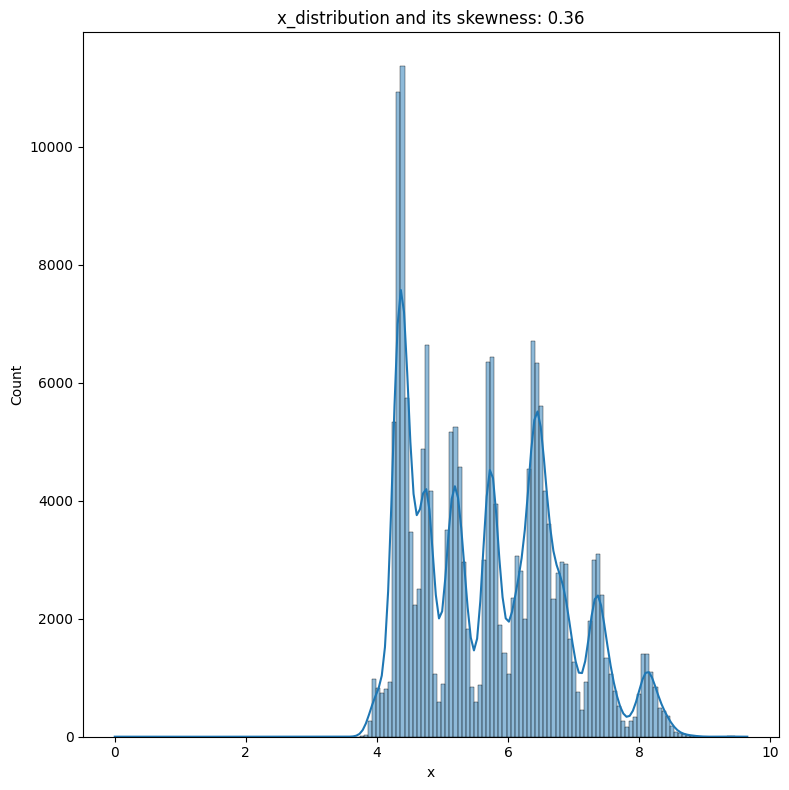

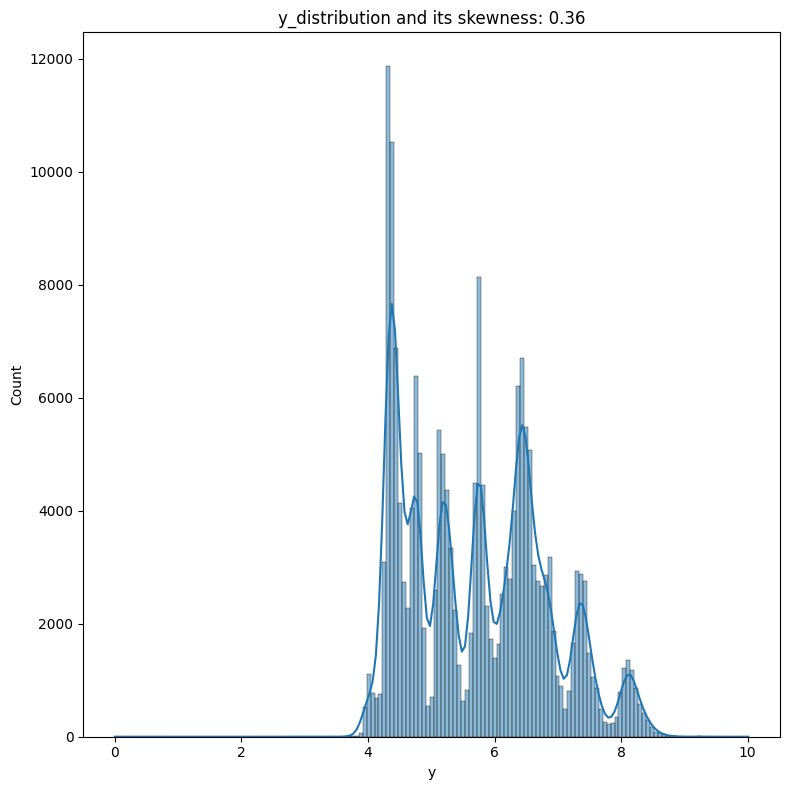

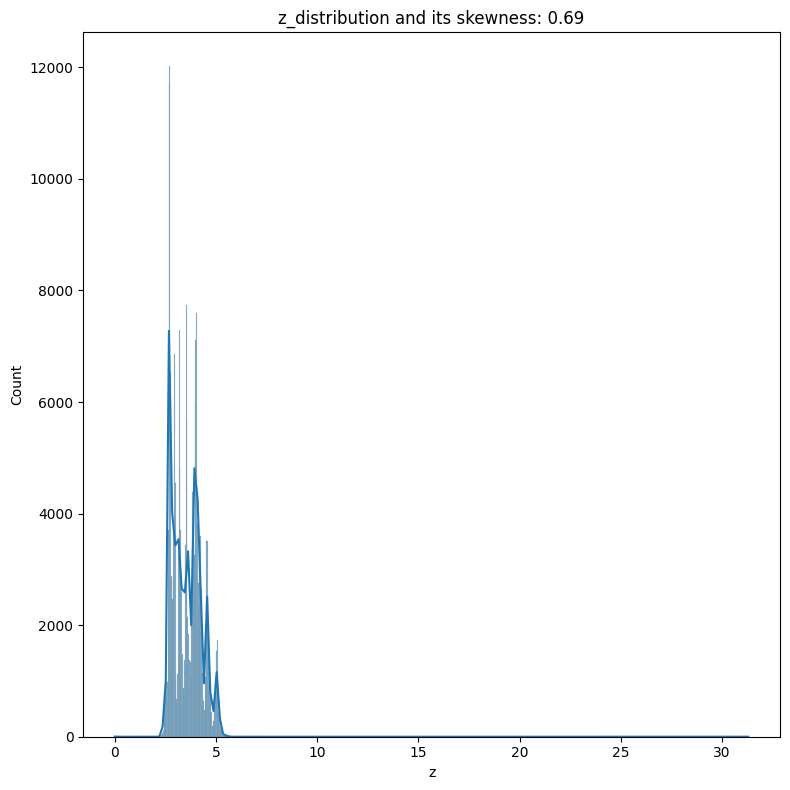

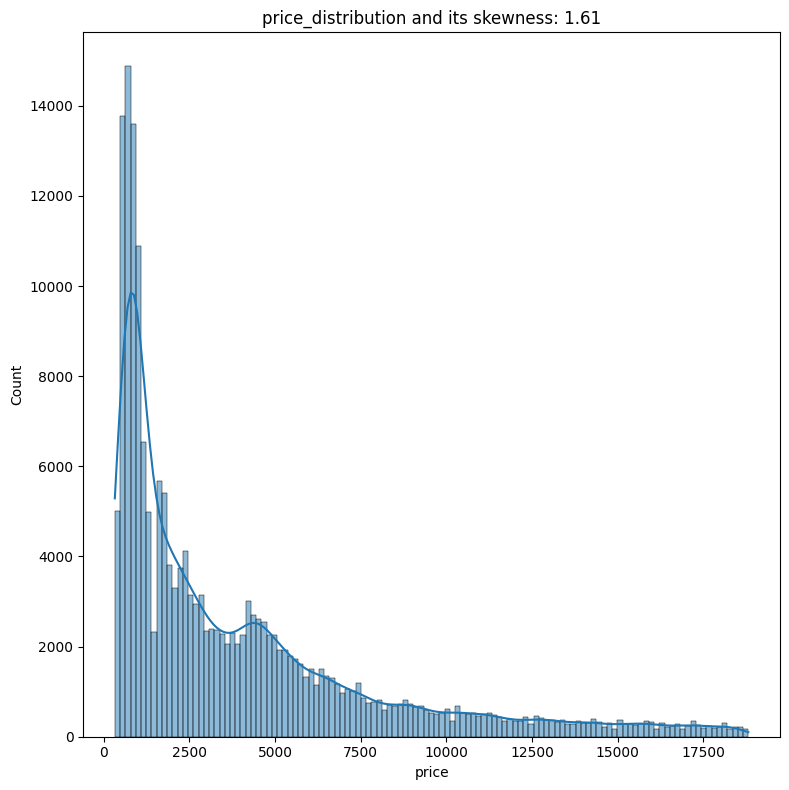

In [10]:
## Uni_variate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.select_dtypes(exclude="O").columns:
    plt.figure(figsize=(8,8))
    skewness = df[col].skew()
    plt.title(f"{col}_distribution and its skewness: {skewness:.2f}")
    sns.histplot(data=df,x=col,kde=True)
    plt.tight_layout()
    plt.show()


In [11]:
## need to trans price and carat using logtransformation as they are highly skewed data
## creating a copy of the dataframe
df_copy = df.copy()

In [12]:
import numpy as np

df_copy["log_price"] = np.log1p(df["price"])
df_copy["log_carat"] = np.log1p(df["carat"])

In [13]:
df_copy.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,log_price,log_carat
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619,9.519295,0.924259
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387,9.502114,1.108563
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772,7.927685,0.530628
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666,6.502790,0.277632
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453,9.578726,0.993252


In [14]:
## removing carat and price
df_copy.drop(["carat","price"],axis=1,inplace=True)

In [15]:
df_copy.head()

,cut,color,clarity,depth,table,x,y,z,log_price,log_carat
0,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,9.519295,0.924259
1,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,9.502114,1.108563
2,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,7.927685,0.530628
3,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,6.502790,0.277632
4,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,9.578726,0.993252


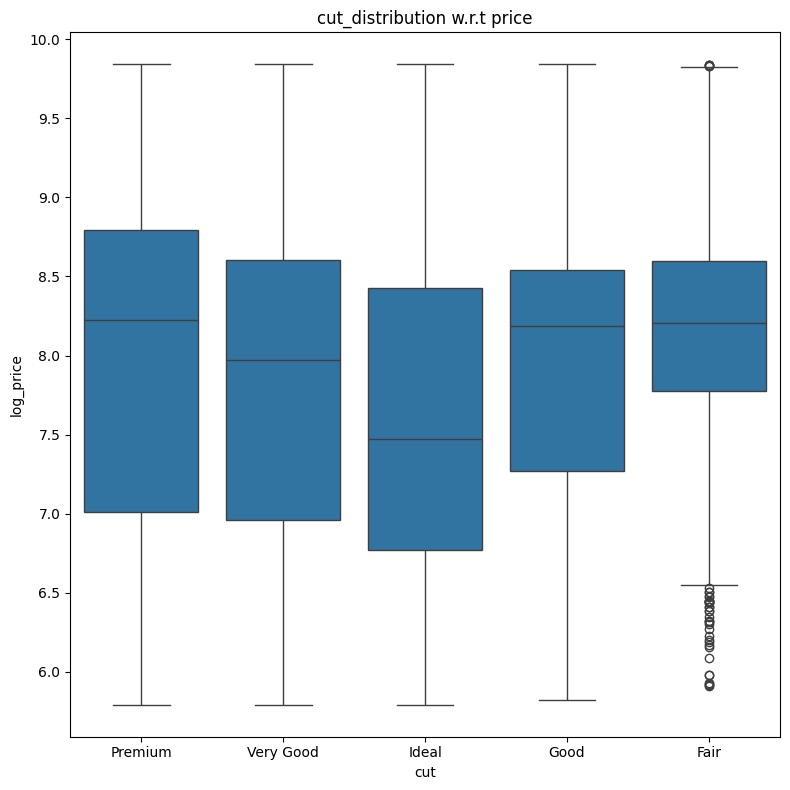

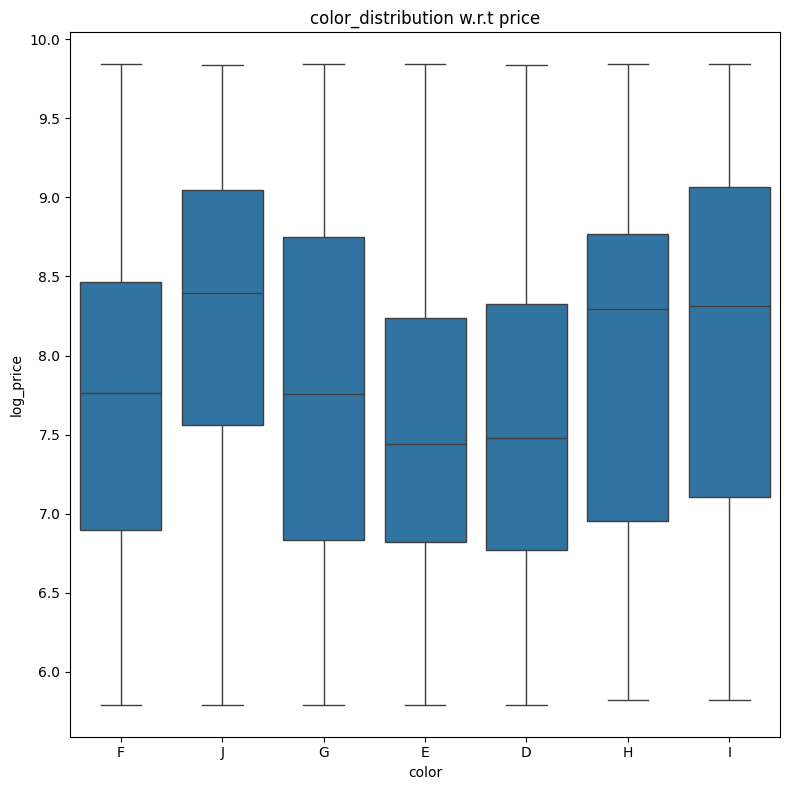

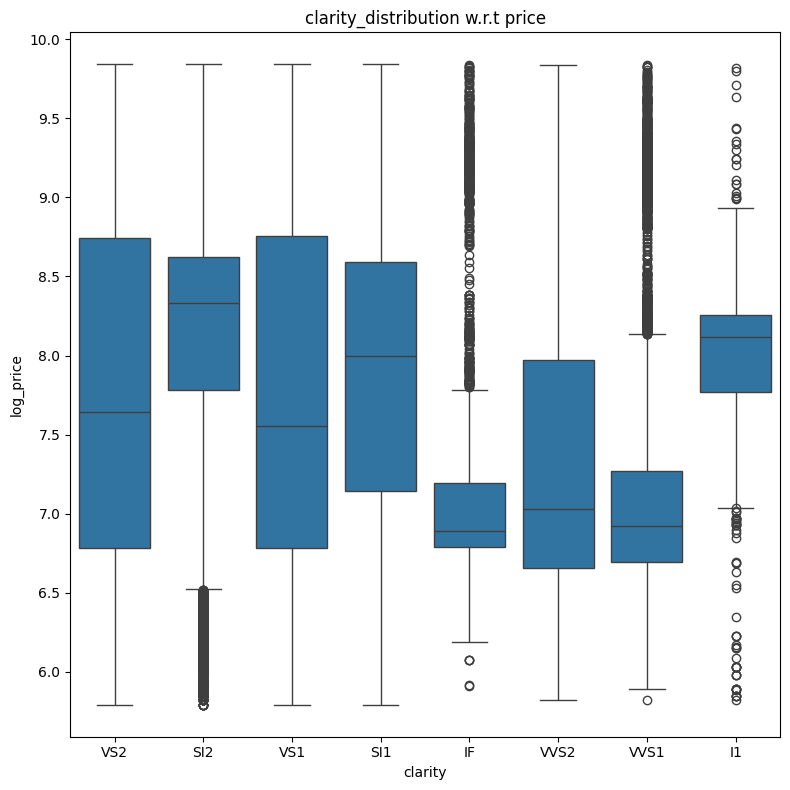

In [22]:
for col in df_copy.select_dtypes(include="O").columns:
    plt.figure(figsize=(8,8))
    plt.title(f"{col}_distribution w.r.t price")
    sns.boxplot(data=df_copy,x=col,y="log_price")
    plt.tight_layout()
    plt.show()


In [21]:
cut_map = {"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
color_map = {"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}
clarity_map = {"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}

In [23]:
df_copy["cut"] = df_copy["cut"].map(cut_map)
df_copy["color"] = df_copy["color"].map(color_map)
df_copy["clarity"] = df_copy["clarity"].map(clarity_map)

In [24]:
df_copy.head()

,cut,color,clarity,depth,table,x,y,z,log_price,log_carat
0,4,3,4,62.2,58.0,7.27,7.33,4.55,9.519295,0.924259
1,3,7,2,62.0,58.0,8.06,8.12,5.05,9.502114,1.108563
2,5,4,5,61.2,57.0,5.69,5.73,3.50,7.927685,0.530628
3,5,4,5,61.6,56.0,4.38,4.41,2.71,6.502790,0.277632
4,4,4,4,62.6,59.0,7.65,7.61,4.77,9.578726,0.993252


<Axes: >

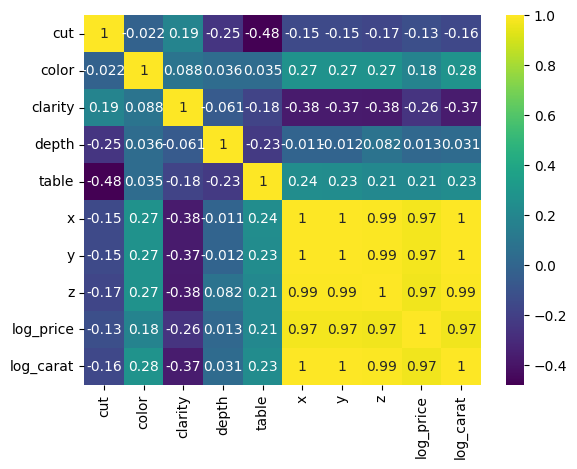

In [27]:
## checking for corr matrix
corr_matrix = df_copy.corr()
sns.heatmap(corr_matrix,annot=True,cmap="viridis")

In [28]:
## X,Y,Z showing signs of multicolinearity -> have to remove more than one or merge them together
df_copy["volume"] = df_copy["x"] * df_copy["y"] * df_copy["z"]

In [29]:
df_copy.head()

,cut,color,clarity,depth,table,x,y,z,log_price,log_carat,volume
0,4,3,4,62.2,58.0,7.27,7.33,4.55,9.519295,0.924259,242.465405
1,3,7,2,62.0,58.0,8.06,8.12,5.05,9.502114,1.108563,330.508360
2,5,4,5,61.2,57.0,5.69,5.73,3.50,7.927685,0.530628,114.112950
3,5,4,5,61.6,56.0,4.38,4.41,2.71,6.502790,0.277632,52.345818
4,4,4,4,62.6,59.0,7.65,7.61,4.77,9.578726,0.993252,277.692705


In [30]:
## removing the unwanted columns
df_copy.drop(["x","y","z"],axis=1,inplace=True)

In [31]:
df_copy.head()

,cut,color,clarity,depth,table,log_price,log_carat,volume
0,4,3,4,62.2,58.0,9.519295,0.924259,242.465405
1,3,7,2,62.0,58.0,9.502114,1.108563,330.508360
2,5,4,5,61.2,57.0,7.927685,0.530628,114.112950
3,5,4,5,61.6,56.0,6.502790,0.277632,52.345818
4,4,4,4,62.6,59.0,9.578726,0.993252,277.692705


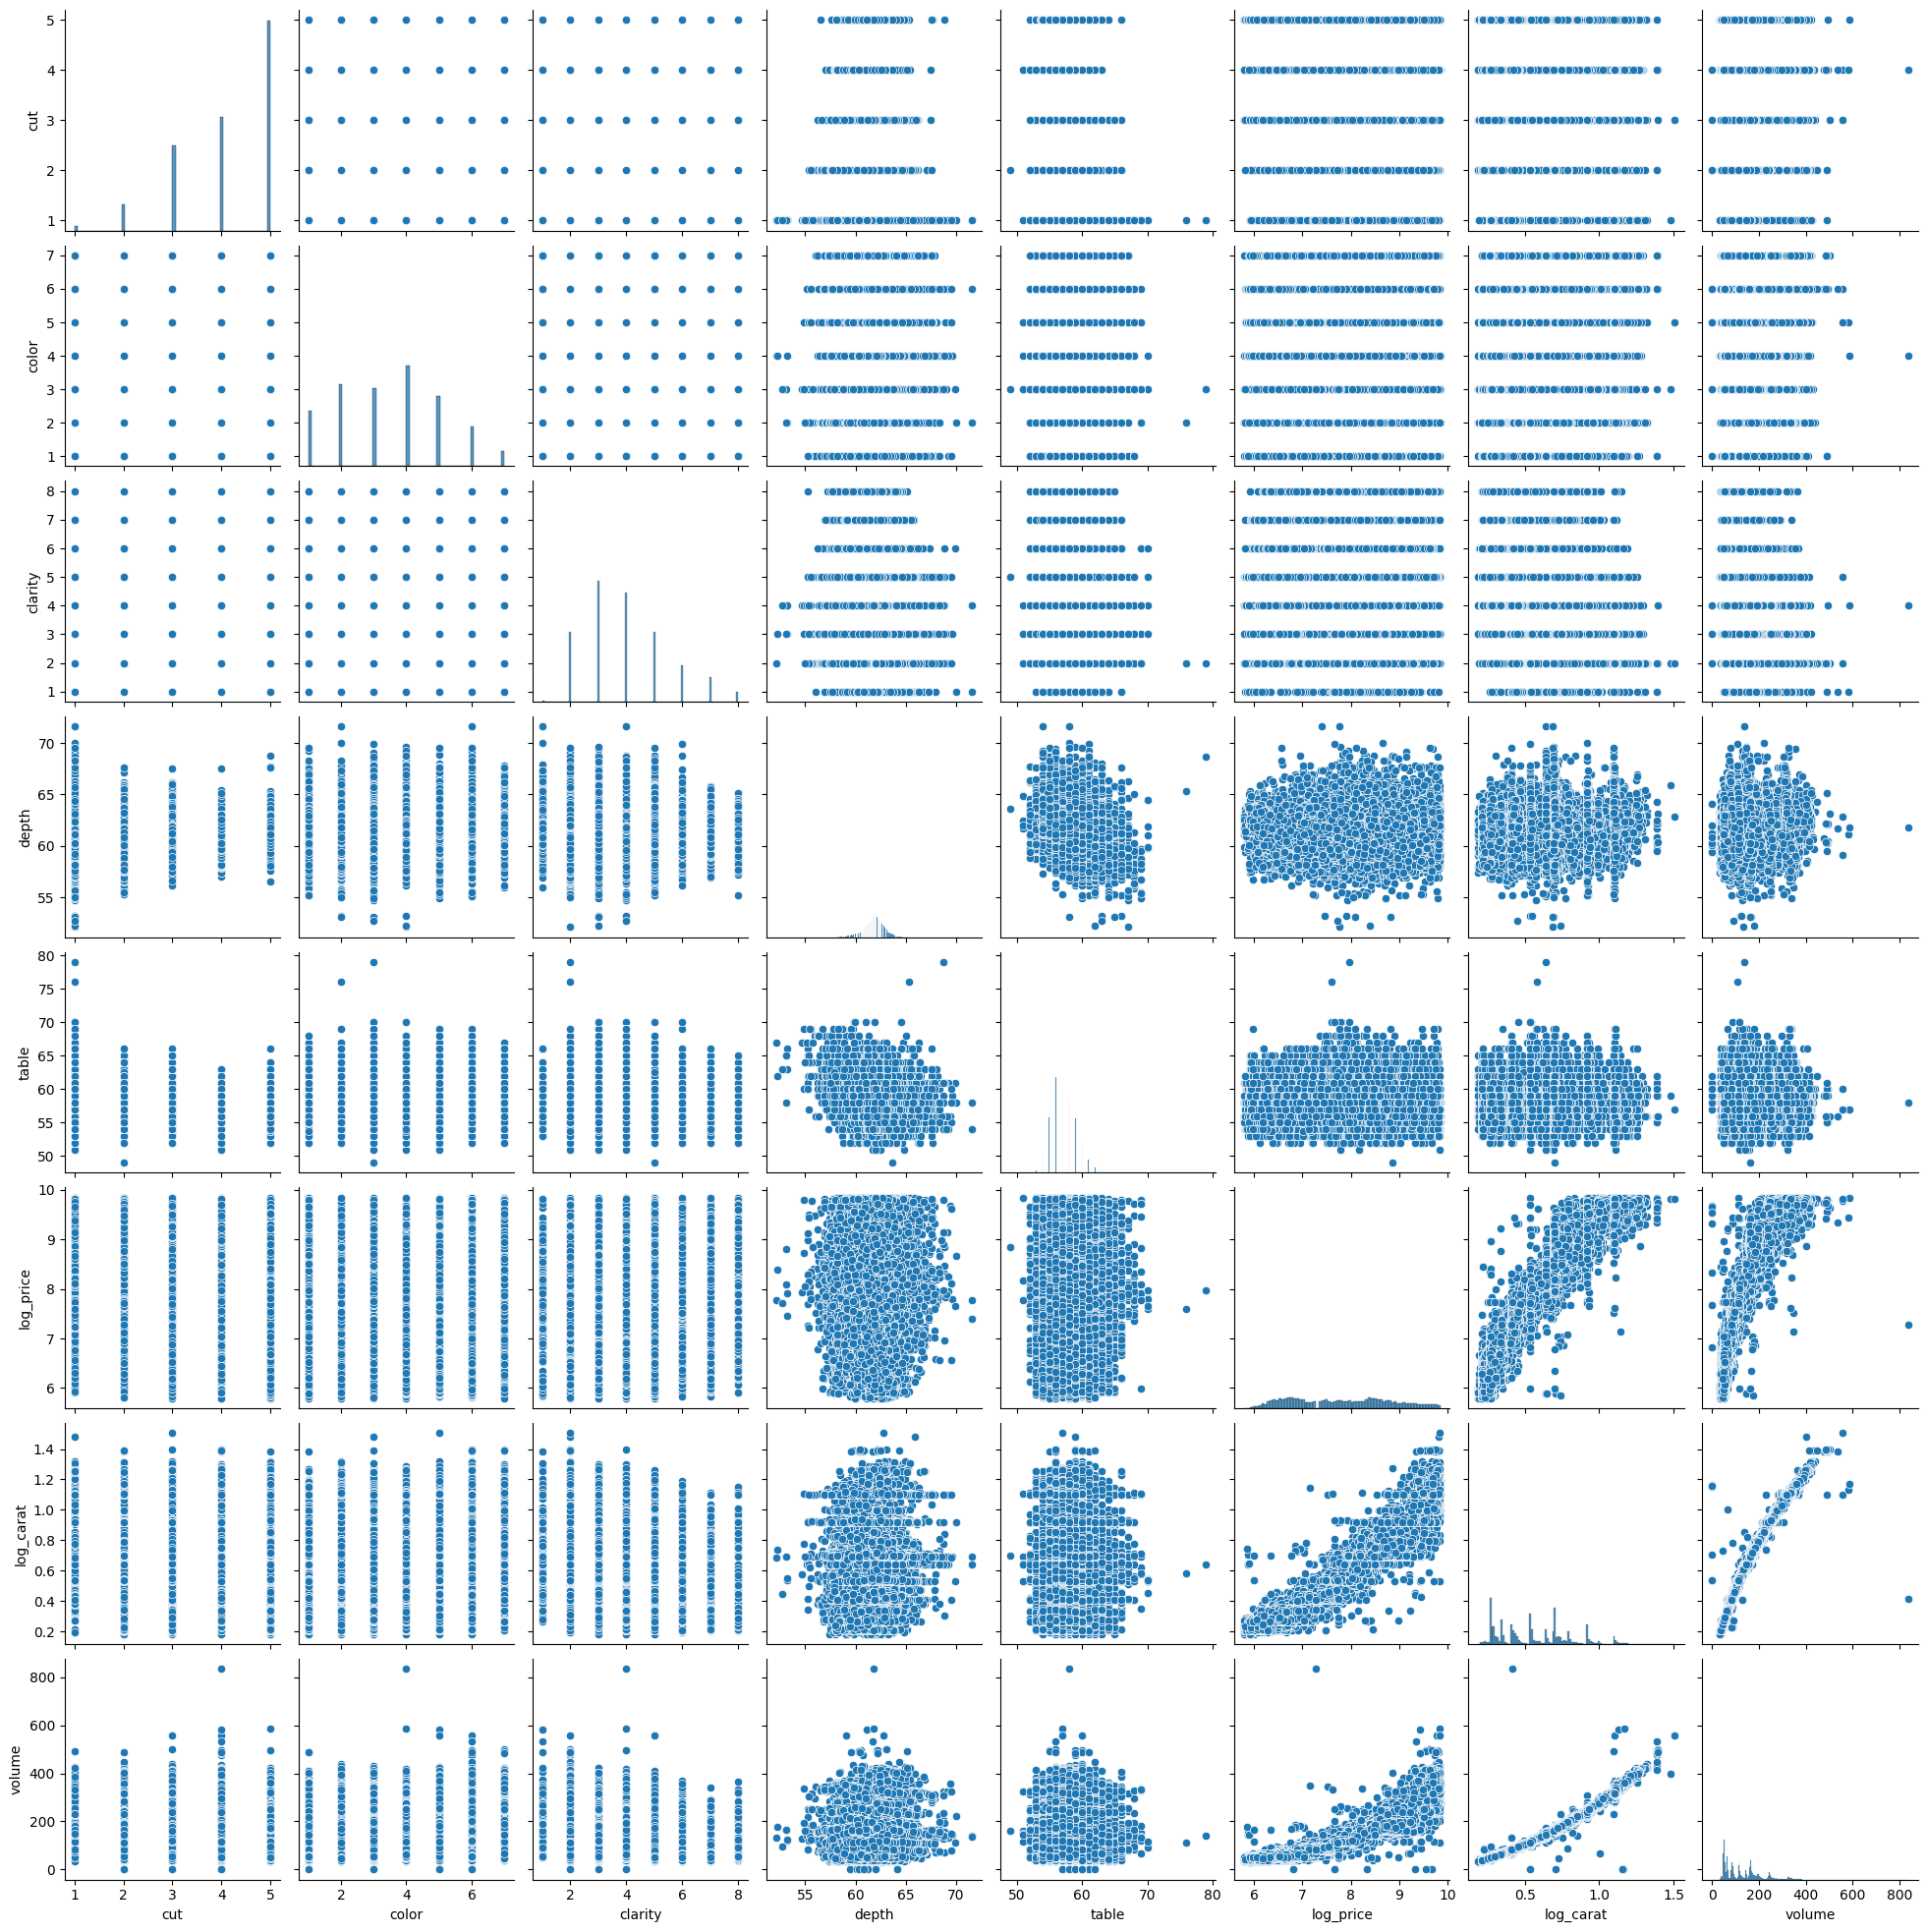

In [36]:
## Multi_variate Analysis 
sns.pairplot(df_copy[df_copy.select_dtypes(exclude="O").columns])

<Axes: xlabel='log_carat', ylabel='log_price'>

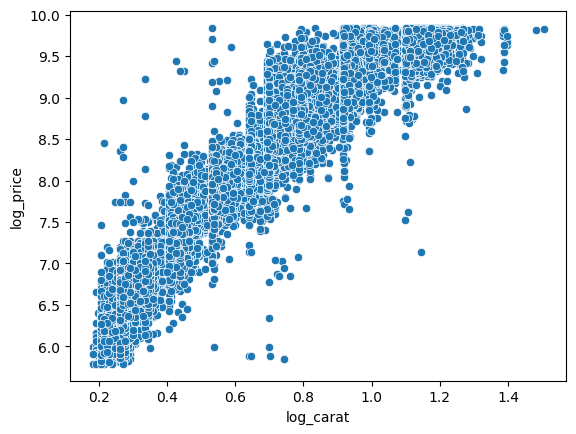

In [37]:
sns.scatterplot(data=df_copy,x="log_carat",y="log_price")

In [38]:
## Strong predictor as the carat increase the cost of the gemstone increases

In [39]:
## saving the cleaned dataset into the local dir
df_copy.to_csv("data/cleaned_gemstone.csv",index=False)